## Кластеризация данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Чтение данных

In [2]:
data = pd.read_csv("data/iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Предобработка данных

In [3]:
data = data.drop(columns=['Id'])
features = data.iloc[:, 0:4]
classes = data.iloc[:, 4]

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

### Метод K-Means

In [6]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_init=15, n_clusters=3)
k_means.fit(scaled_data)

labels = k_means.predict(scaled_data)

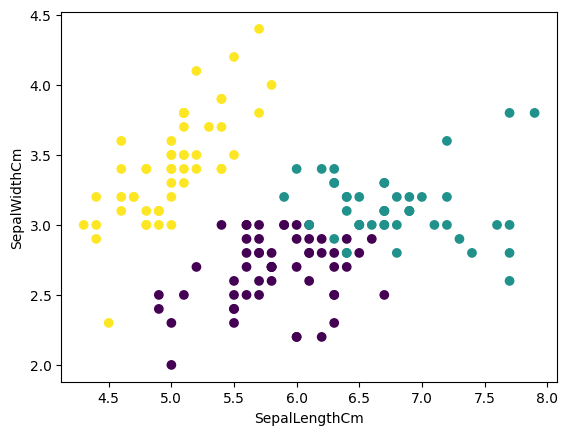

In [7]:
plt.scatter(data.loc[:, ['SepalLengthCm']], data.loc[:, ['SepalWidthCm']], c=labels)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

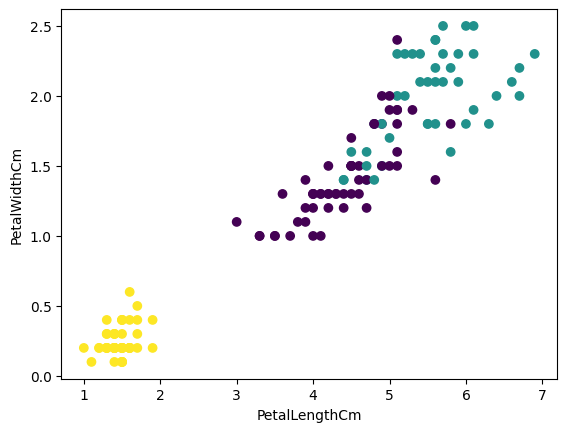

In [8]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=labels)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

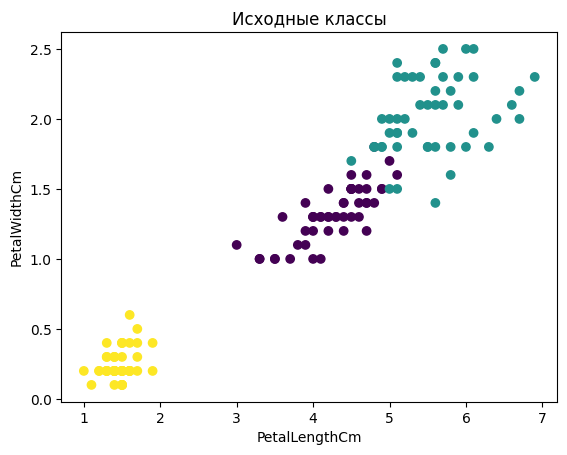

In [13]:
correct_labels = classes.replace({"Iris-setosa": 2, "Iris-versicolor": 0, 'Iris-virginica': 1})
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=correct_labels)
plt.title('Исходные классы')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

### t-SNE

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(features)

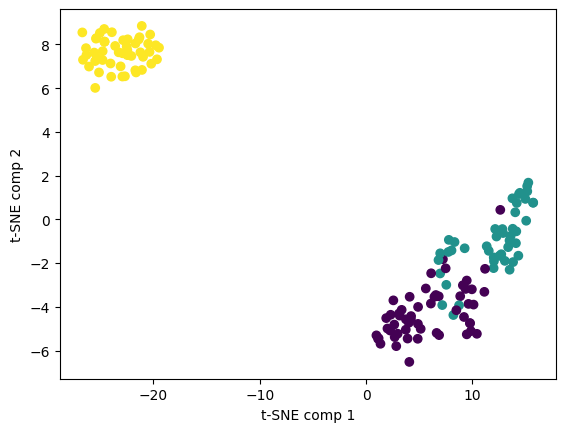

In [11]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels)
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

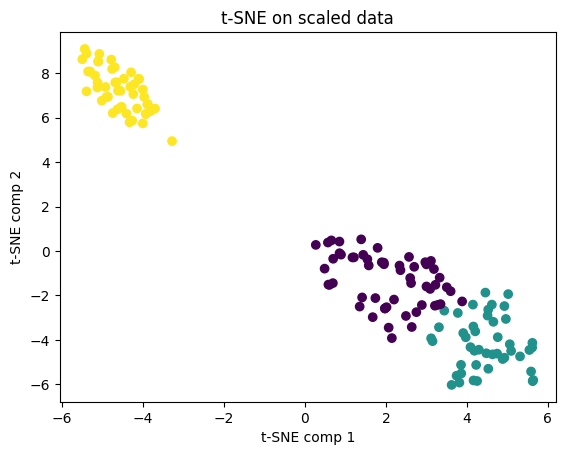

In [12]:
perplexity = 50
tsne = TSNE(n_components=2, perplexity=perplexity)
tsne_data = tsne.fit_transform(scaled_data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels)
plt.title(f't-SNE on scaled data')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()